# Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

1.2 Do you think scaling is necessary for clustering in this case? Justify

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

Dataset for Problem 1: bank_marketing_part1_Data.csv

Data Dictionary for Market Segmentation:

spending: Amount spent by the customer per month (in 1000s) advance_payments: Amount paid by the customer in advance by cash (in 100s) probability_of_full_payment: Probability of payment done in full by the customer to the bank current_balance: Balance amount left in the account to make purchases (in 1000s) credit_limit: Limit of the amount in credit card (10000s) min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s) max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)


# 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).¶

### Import libraries and load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from sklearn.cluster import KMeans 
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
os.getcwd()

'C:\\Users\\anand'

In [3]:
os.chdir("C:/Users/anand/Downloads")

### LOAD THE DATA

In [4]:
df=pd.read_csv("bank_marketing_part1_Data.csv")

### Checking the data

In [5]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [6]:
df.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


In [7]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


Insights 7 variables and 210 records.

No missing record based on intial analysis.

All the variables numeric type.

In [9]:
df.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

In [10]:
df.shape

(210, 7)

In [11]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

Insights No Missing Values

In [12]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]


Number of duplicate rows = 0


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


In [13]:
df.describe(percentiles=[.25,0.50,0.75,0.90]).T

,count,mean,std,min,25%,50%,75%,90%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,18.9880,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,16.4540,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.8993,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.2733,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,3.7865,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,5.5376,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.1850,6.5500


Insights

• Based on summary descriptive, the data looks good.

• We see for most of the variable, mean/medium are nearly equal

• Include a 90% to see variations and it looks distributely evenly

• Std Deviation is high for spending variable


### univariate analysis:

In [14]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

Description of spending
----------------------------------------------------------------------------
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64 Distribution of spending
----------------------------------------------------------------------------


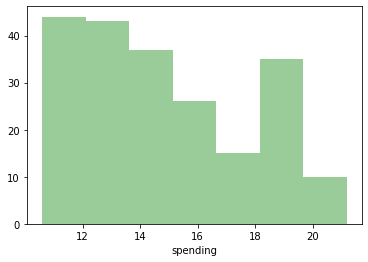

BoxPlot of spending
----------------------------------------------------------------------------


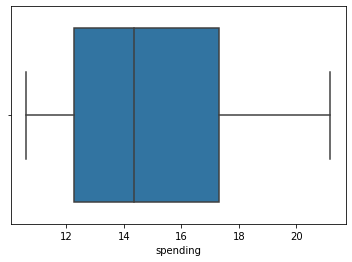

In [15]:
univariateAnalysis_numeric('spending',20);

Description of advance_payments
----------------------------------------------------------------------------
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64 Distribution of advance_payments
----------------------------------------------------------------------------


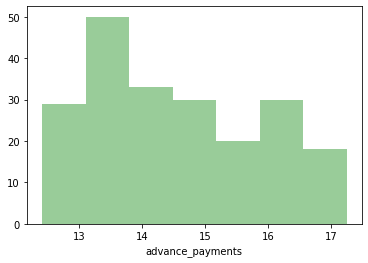

BoxPlot of advance_payments
----------------------------------------------------------------------------


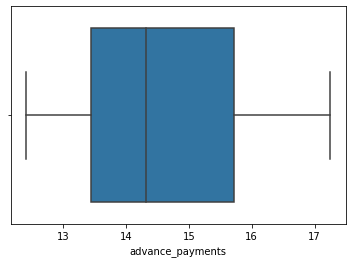

In [16]:
univariateAnalysis_numeric('advance_payments',20);

Description of probability_of_full_payment
----------------------------------------------------------------------------
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64 Distribution of probability_of_full_payment
----------------------------------------------------------------------------


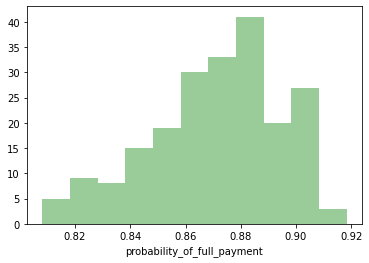

BoxPlot of probability_of_full_payment
----------------------------------------------------------------------------


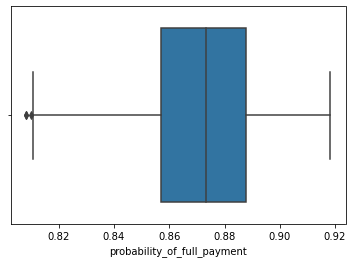

In [17]:
univariateAnalysis_numeric('probability_of_full_payment',20);

Description of current_balance
----------------------------------------------------------------------------
count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64 Distribution of current_balance
----------------------------------------------------------------------------


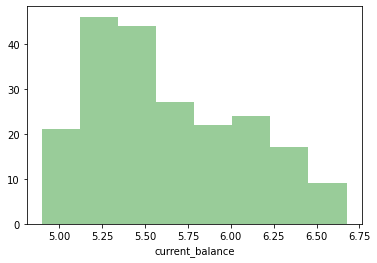

BoxPlot of current_balance
----------------------------------------------------------------------------


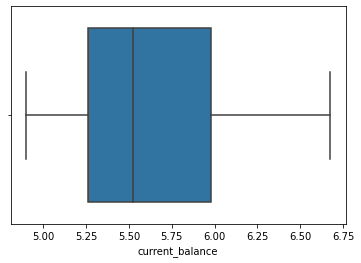

In [18]:
univariateAnalysis_numeric('current_balance',20);

Description of credit_limit
----------------------------------------------------------------------------
count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64 Distribution of credit_limit
----------------------------------------------------------------------------


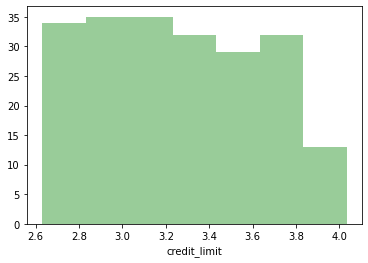

BoxPlot of credit_limit
----------------------------------------------------------------------------


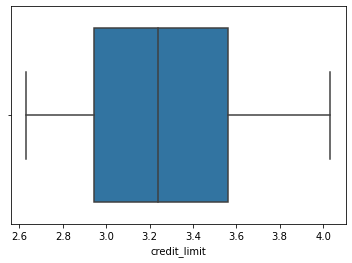

In [19]:
univariateAnalysis_numeric('credit_limit',20);

Description of min_payment_amt
----------------------------------------------------------------------------
count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64 Distribution of min_payment_amt
----------------------------------------------------------------------------


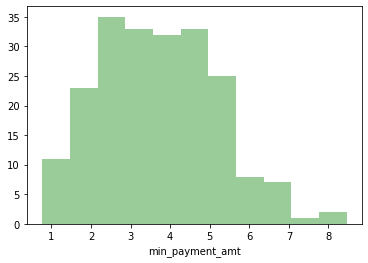

BoxPlot of min_payment_amt
----------------------------------------------------------------------------


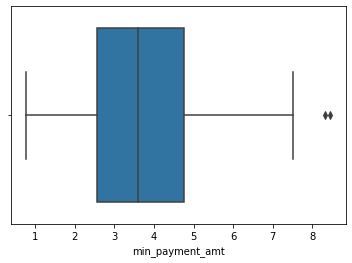

In [20]:
univariateAnalysis_numeric('min_payment_amt',20);

Description of max_spent_in_single_shopping
----------------------------------------------------------------------------
count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64 Distribution of max_spent_in_single_shopping
----------------------------------------------------------------------------


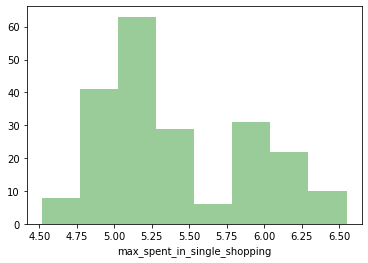

BoxPlot of max_spent_in_single_shopping
----------------------------------------------------------------------------


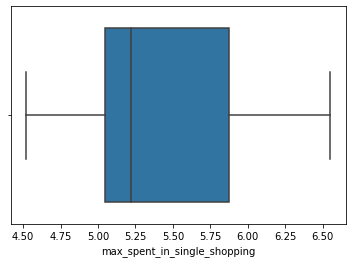

In [21]:
univariateAnalysis_numeric('max_spent_in_single_shopping',20);

In [22]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

7

Description of spending
----------------------------------------------------------------------------
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64 Distribution of spending
----------------------------------------------------------------------------


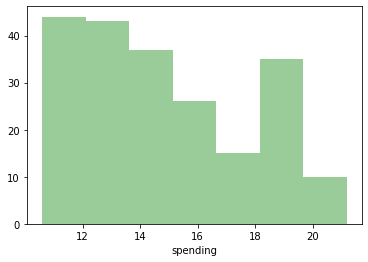

BoxPlot of spending
----------------------------------------------------------------------------


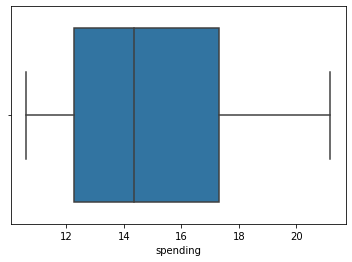

Description of advance_payments
----------------------------------------------------------------------------
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64 Distribution of advance_payments
----------------------------------------------------------------------------


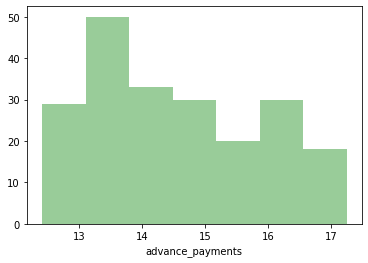

BoxPlot of advance_payments
----------------------------------------------------------------------------


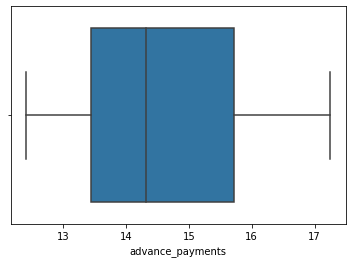

Description of probability_of_full_payment
----------------------------------------------------------------------------
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64 Distribution of probability_of_full_payment
----------------------------------------------------------------------------


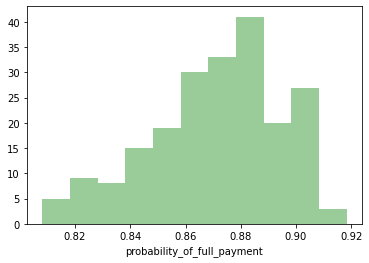

BoxPlot of probability_of_full_payment
----------------------------------------------------------------------------


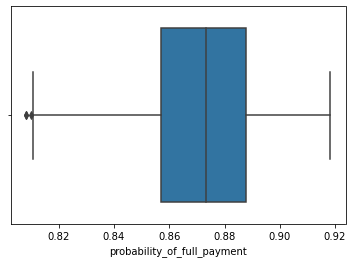

Description of current_balance
----------------------------------------------------------------------------
count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64 Distribution of current_balance
----------------------------------------------------------------------------


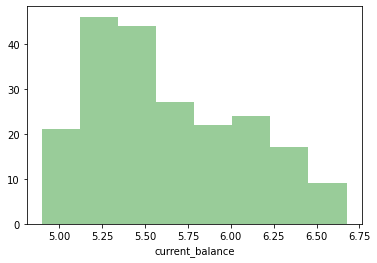

BoxPlot of current_balance
----------------------------------------------------------------------------


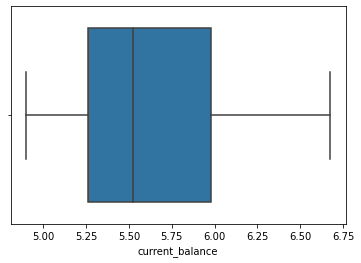

Description of credit_limit
----------------------------------------------------------------------------
count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64 Distribution of credit_limit
----------------------------------------------------------------------------


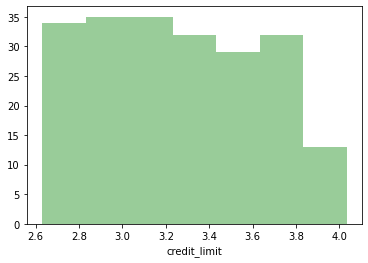

BoxPlot of credit_limit
----------------------------------------------------------------------------


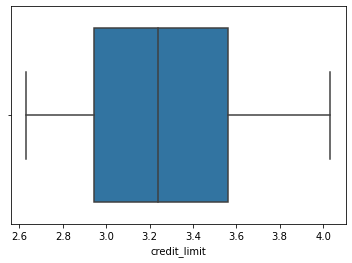

Description of min_payment_amt
----------------------------------------------------------------------------
count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64 Distribution of min_payment_amt
----------------------------------------------------------------------------


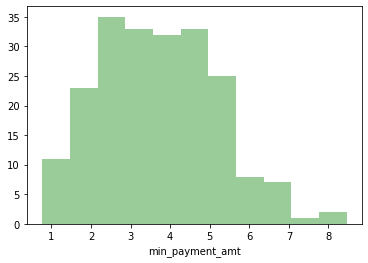

BoxPlot of min_payment_amt
----------------------------------------------------------------------------


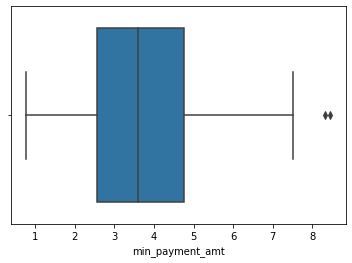

Description of max_spent_in_single_shopping
----------------------------------------------------------------------------
count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64 Distribution of max_spent_in_single_shopping
----------------------------------------------------------------------------


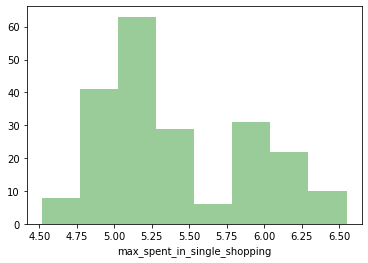

BoxPlot of max_spent_in_single_shopping
----------------------------------------------------------------------------


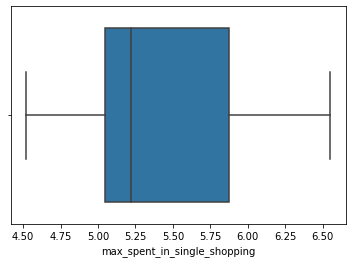

In [23]:
for x in lstnumericcolumns:
 univariateAnalysis_numeric(x,20)

### Multivariate analysis

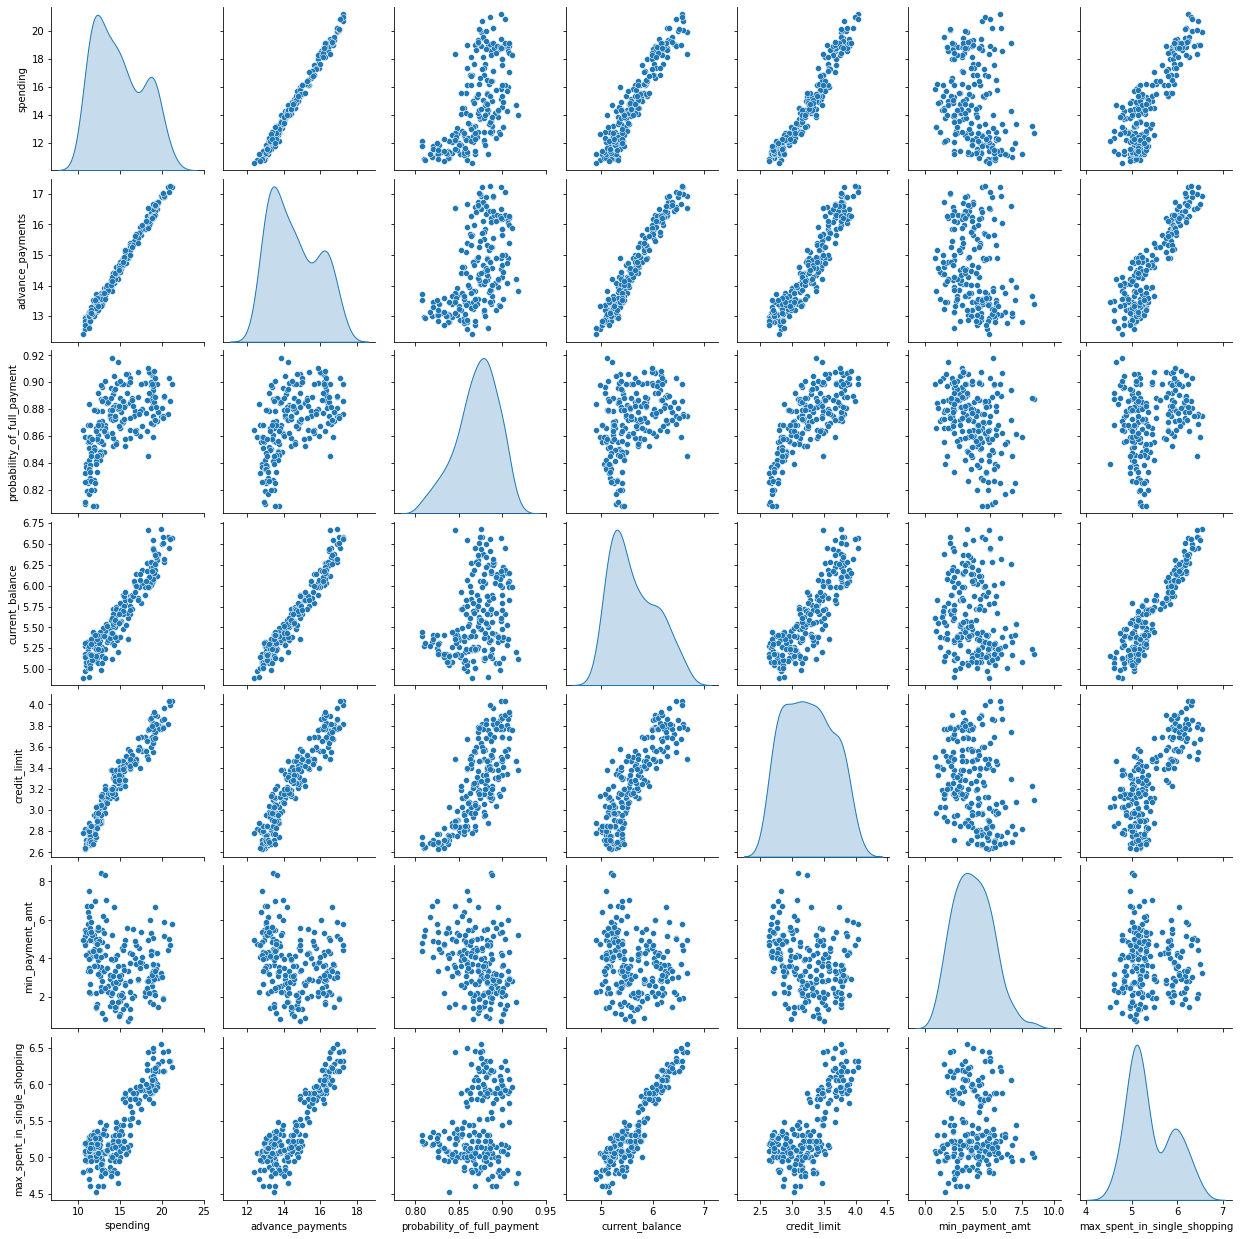

In [24]:
sns.pairplot(df,diag_kind='kde');
plt.show()

• Strong positive correlation between - spending & advance_payments, - advance_payments & current_balance, - credit_limit & spending - spending & current_balance - credit_limit & advance_payments - max_spent_in_single_shopping current_balance

In [25]:
df.corr().T

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


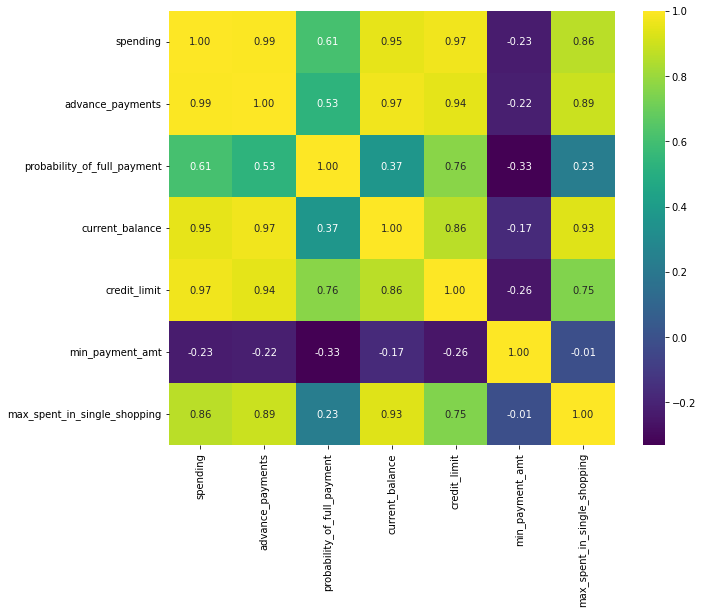

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="viridis")
plt.show()

Let us see the significant correlation either negative or positive among independent attributes. Since there may be positive as well as -ve correlation Sorting according to the correlation Due to symmetry.. dropping duplicate entries.

In [27]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(ascending=False)
so=so[(so<1) & (so>0.3)].drop_duplicates().to_frame()
so.columns = ['correlation']
so

correlation
advance_payments             spending                         0.994341
                             current_balance                  0.972422
credit_limit                 spending                         0.970771
current_balance              spending                         0.949985
advance_payments             credit_limit                     0.944829
max_spent_in_single_shopping current_balance                  0.932806
advance_payments             max_spent_in_single_shopping     0.890784
spending                     max_spent_in_single_shopping     0.863693
current_balance              credit_limit                     0.860415
probability_of_full_payment  credit_limit                     0.761635
max_spent_in_single_shopping credit_limit                     0.749131
spending                     probability_of_full_payment      0.608288
advance_payments             probability_of_full_payment      0.529244
probability_of_full_payment  current_balance                  0.367915
                             min_payment_amt                  0.331471

### Checking outliers

In [28]:
def check_outliers(data):
    vData_num = data.loc[:,data.columns != 'class']
    Q1 = vData_num.quantile(0.25)
    Q3 = vData_num.quantile(0.75)
    IQR = Q3 - Q1
    count = 0
    
    vData_num_mod = ((vData_num < (Q1 - 1.5 * IQR)) |(vData_num > (Q3 + 1.5 *IQR)))
    
    for col in vData_num_mod:
        if(1 in vData_num_mod[col].value_counts().index):
            print("No. of outliers in %s: %d" %( col, vData_num_mod[col].value_counts().iloc[1]))
            count += 1
    print("\n\nNo of attributes with outliers are :", count)
    
check_outliers(df)

No. of outliers in probability_of_full_payment: 3
No. of outliers in min_payment_amt: 2


No of attributes with outliers are : 2


In [29]:
df1=df.copy()

In [30]:
check_outliers(df1)

No. of outliers in probability_of_full_payment: 3
No. of outliers in min_payment_amt: 2


No of attributes with outliers are : 2


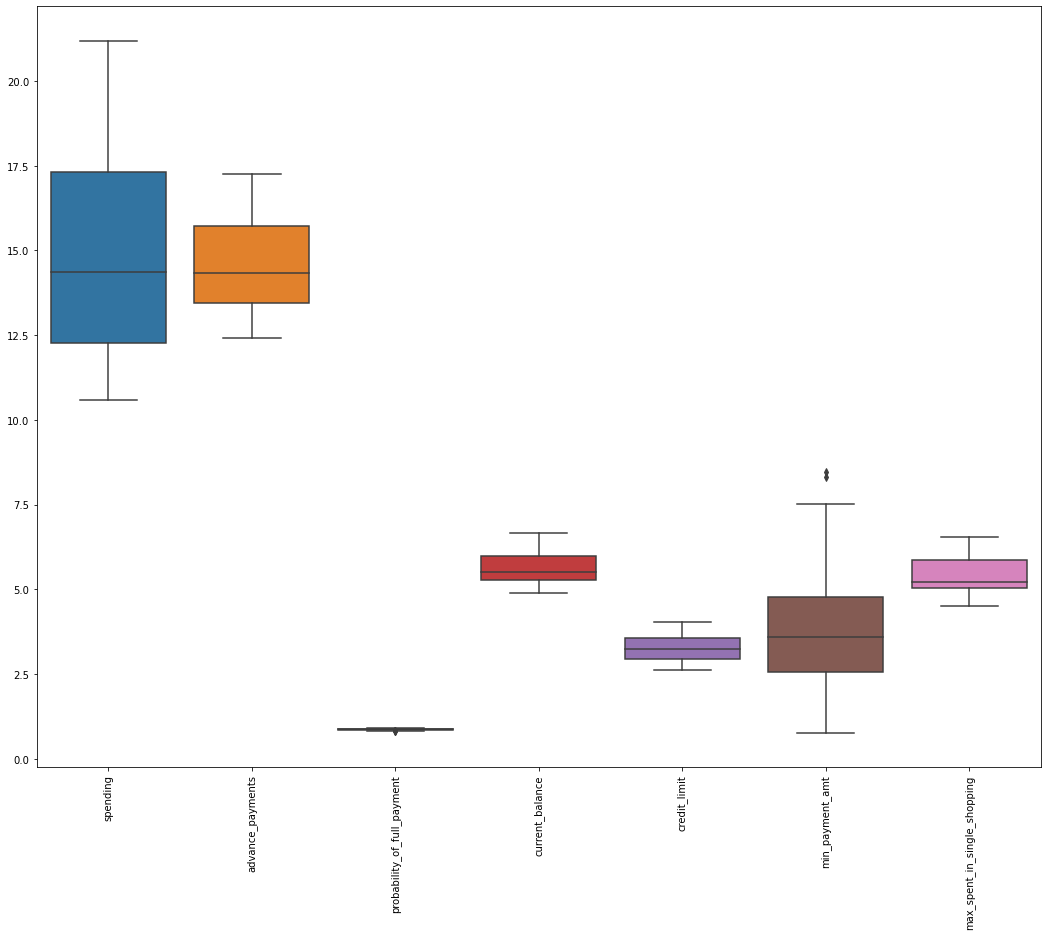

In [31]:
plt.figure(figsize=(18,14))
box = sns.boxplot(data=df1)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);
plt.show()

In above figure most of the outliers are treated

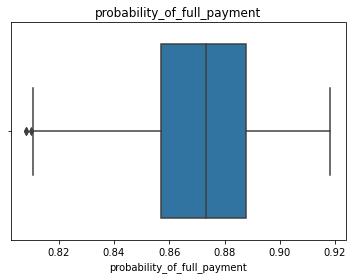

In [32]:
plt.title('probability_of_full_payment')
sns.boxplot(df1['probability_of_full_payment'],orient='horizondal',color=None)
plt.show()

Though in above plot, we treated the outlier, we still see one as per the boxplot, it is okay, as it is
no extrme and on lower band.

### Spending Variable

In [33]:
print('Range of values: ', df['spending'].max()-df['spending'].min())

Range of values:  10.59


In [34]:
print('Minimum spending: ', df['spending'].min())
print('Maximum spending: ',df['spending'].max())
print('Mean value: ', df['spending'].mean())
print('Median value: ',df['spending'].median())
print('Standard deviation: ', df['spending'].std())
print('Null values: ',df['spending'].isnull().any())

Minimum spending:  10.59
Maximum spending:  21.18
Mean value:  14.847523809523818
Median value:  14.355
Standard deviation:  2.909699430687361
Null values:  False


In [35]:
Q1=df['spending'].quantile(q=0.25)
Q3=df['spending'].quantile(q=0.75)
print('spending - 1st Quartile (Q1) is: ', Q1)
print('spending - 3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of spending is ', stats.iqr(df['spending']))

spending - 1st Quartile (Q1) is:  12.27
spending - 3rd Quartile (Q3) is:  17.305
Interquartile range (IQR) of spending is  5.035


In [36]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in spending: ', L_outliers)
print('Upper outliers in spending: ', U_outliers)

Lower outliers in spending:  4.717499999999999
Upper outliers in spending:  24.8575


In [37]:
print('Number of outliers in spending upper : ', df[df['spending']>24.8575]['spending'].count())
print('Number of outliers in spending lower : ', df[df['spending']<4.717499]['spending'].count())
print('% of Outlier in spending upper: ',round(df[df['spending']>24.8575]['spending'].count()*100/len(df)), '%')
print('% of Outlier in spending lower: ',round(df[df['spending']<4.717499]['spending'].count()*100/len(df)), '%')

Number of outliers in spending upper :  0
Number of outliers in spending lower :  0
% of Outlier in spending upper:  0 %
% of Outlier in spending lower:  0 %


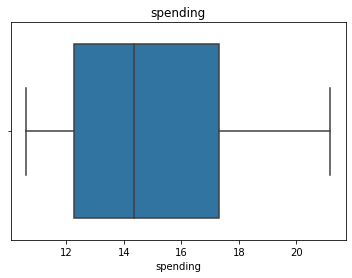

In [38]:
plt.title('spending')
sns.boxplot(df['spending'],orient='horizondal',color=None)
plt.show()

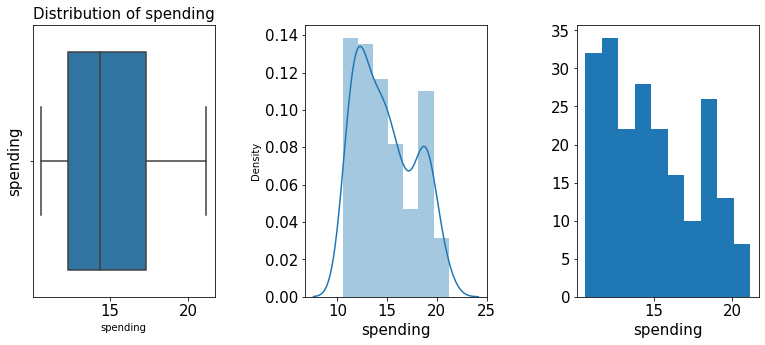

In [39]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='spending',data=df,orient='v',ax=ax1)
ax1.set_ylabel('spending', fontsize=15)
ax1.set_title('Distribution of spending', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['spending'],ax=ax2)
ax2.set_xlabel('spending', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['spending'])
ax3.set_xlabel('spending', fontsize=15)
ax3.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.show()

### Advance_payments variable

In [40]:
print('Range of values: ', df['advance_payments'].max()-df['advance_payments'].min())

Range of values:  4.84


In [41]:
print('Minimum advance_payments: ', df['advance_payments'].min())
print('Maximum advance_payments: ',df['advance_payments'].max())
print('Mean value: ', df['advance_payments'].mean())
print('Median value: ',df['advance_payments'].median())
print('Standard deviation: ', df['advance_payments'].std())
print('Null values: ',df['advance_payments'].isnull().any())

Minimum advance_payments:  12.41
Maximum advance_payments:  17.25
Mean value:  14.559285714285727
Median value:  14.32
Standard deviation:  1.305958726564022
Null values:  False


In [42]:
Q1=df['advance_payments'].quantile(q=0.25)
Q3=df['advance_payments'].quantile(q=0.75)
print('advance_payments - 1st Quartile (Q1) is: ', Q1)
print('advance_payments - 3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of advance_payments is ', stats.iqr(df['advance_payments']))

advance_payments - 1st Quartile (Q1) is:  13.45
advance_payments - 3rd Quartile (Q3) is:  15.715
Interquartile range (IQR) of advance_payments is  2.2650000000000006


In [43]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in advance_payments: ', L_outliers)
print('Upper outliers in advance_payments: ', U_outliers)

Lower outliers in advance_payments:  10.052499999999998
Upper outliers in advance_payments:  19.1125


In [44]:
print('Number of outliers in advance_payments upper : ',df[df['advance_payments']>19.1125]['advance_payments'].count())
print('Number of outliers in advance_payments lower : ',df[df['advance_payments']<10.052499]['advance_payments'].count())
print('% of Outlier in advance_payments upper:',round(df[df['advance_payments']>19.1125]['advance_payments'].count()*100/len(df)), '%')
print('% of Outlier in advance_payments lower:',round(df[df['advance_payments']<10.052499]['advance_payments'].count()*100/len(df)), '%')

Number of outliers in advance_payments upper :  0
Number of outliers in advance_payments lower :  0
% of Outlier in advance_payments upper: 0 %
% of Outlier in advance_payments lower: 0 %


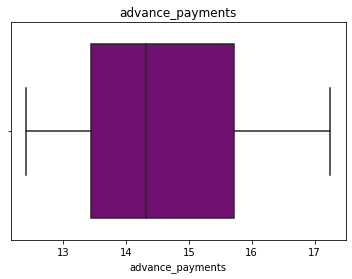

In [45]:
plt.title('advance_payments')
sns.boxplot(df['advance_payments'],orient='horizondal',color='purple')
plt.show()

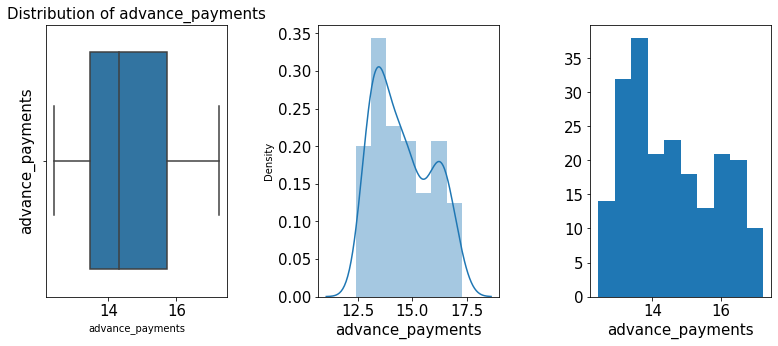

In [46]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='advance_payments',data=df,orient='v',ax=ax1)
ax1.set_ylabel('advance_payments', fontsize=15)
ax1.set_title('Distribution of advance_payments', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['advance_payments'],ax=ax2)
ax2.set_xlabel('advance_payments', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['advance_payments'])
ax3.set_xlabel('advance_payments', fontsize=15)
ax3.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.show()

### probability_of_full_payment variable

In [47]:
print('Range of values: ', df['probability_of_full_payment'].max()-df['probability_of_full_payment'].min())

Range of values:  0.11019999999999996


In [48]:
print('Minimum probability_of_full_payment ', df['probability_of_full_payment'].min())
print('Maximum probability_of_full_payment: ',df['probability_of_full_payment'].max())
print('Mean value: ', df['probability_of_full_payment'].mean())
print('Median value: ',df['probability_of_full_payment'].median())
print('Standard deviation: ', df['probability_of_full_payment'].std())
print('Null values: ',df['probability_of_full_payment'].isnull().any())

Minimum probability_of_full_payment  0.8081
Maximum probability_of_full_payment:  0.9183
Mean value:  0.8709985714285714
Median value:  0.8734500000000001
Standard deviation:  0.0236294165838465
Null values:  False


In [49]:
Q1=df['probability_of_full_payment'].quantile(q=0.25)
Q3=df['probability_of_full_payment'].quantile(q=0.75)
print('probability_of_full_payment - 1st Quartile (Q1) is: ', Q1)
print('probability_of_full_payment - 3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of probability_of_full_payment is ', stats.iqr(df['probability_of_full_payment']))

probability_of_full_payment - 1st Quartile (Q1) is:  0.8569
probability_of_full_payment - 3rd Quartile (Q3) is:  0.887775
Interquartile range (IQR) of probability_of_full_payment is  0.030874999999999986


In [50]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in probability_of_full_payment: ', L_outliers)
print('Upper outliers in probability_of_full_payment: ', U_outliers)

Lower outliers in probability_of_full_payment:  0.8105875
Upper outliers in probability_of_full_payment:  0.9340875


In [51]:
print('Number of outliers in probability_of_full_payment upper : ',df[df['probability_of_full_payment']>0.9340875]['probability_of_full_payment'].count())
print('Number of outliers in probability_of_full_payment lower : ',df[df['probability_of_full_payment']<0.8105875]['probability_of_full_payment'].count())
print('% of Outlier in probability_of_full_payment upper:',round(df[df['probability_of_full_payment']>0.9340875]['probability_of_full_payment'].count()*100/len(df)), '%')
print('% of Outlier in probability_of_full_payment lower:',round(df[df['probability_of_full_payment']<0.8105875]['probability_of_full_payment'].count()*100/len(df)), '%')

Number of outliers in probability_of_full_payment upper :  0
Number of outliers in probability_of_full_payment lower :  3
% of Outlier in probability_of_full_payment upper: 0 %
% of Outlier in probability_of_full_payment lower: 1 %


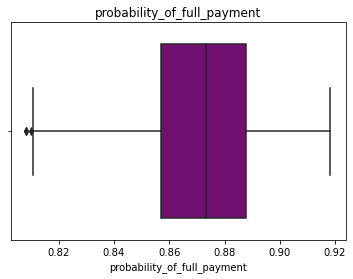

In [52]:
plt.title('probability_of_full_payment')
sns.boxplot(df['probability_of_full_payment'],orient='horizondal',color='purple')
plt.show()

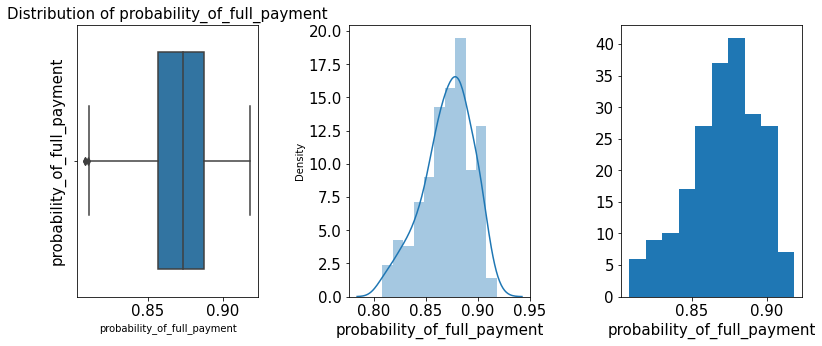

In [53]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='probability_of_full_payment',data=df,orient='v',ax=ax1)
ax1.set_ylabel('probability_of_full_payment', fontsize=15)
ax1.set_title('Distribution of probability_of_full_payment', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['probability_of_full_payment'],ax=ax2)
ax2.set_xlabel('probability_of_full_payment', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['probability_of_full_payment'])
ax3.set_xlabel('probability_of_full_payment', fontsize=15)
ax3.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.show()

### current_balance variable

In [54]:
print('Range of values: ', df['current_balance'].max()-df['current_balance'].min())

Range of values:  1.7759999999999998


In [55]:
print('Minimum current_balance: ', df['current_balance'].min())
print('Maximum current_balance: ',df['current_balance'].max())
print('Mean value: ', df['current_balance'].mean())
print('Median value: ',df['current_balance'].median())
print('Standard deviation: ', df['current_balance'].std())
print('Null values: ',df['current_balance'].isnull().any())

Minimum current_balance:  4.899
Maximum current_balance:  6.675
Mean value:  5.628533333333335
Median value:  5.5235
Standard deviation:  0.44306347772644944
Null values:  False


In [56]:
Q1=df['current_balance'].quantile(q=0.25)
Q3=df['current_balance'].quantile(q=0.75)
print('current_balance - 1st Quartile (Q1) is: ', Q1)
print('current_balance - 3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of current_balance is ', stats.iqr(df['current_balance']))

current_balance - 1st Quartile (Q1) is:  5.26225
current_balance - 3rd Quartile (Q3) is:  5.97975
Interquartile range (IQR) of current_balance is  0.7175000000000002


In [57]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in current_balance: ', L_outliers)
print('Upper outliers in current_balance: ', U_outliers)

Lower outliers in current_balance:  4.186
Upper outliers in current_balance:  7.056000000000001


In [58]:
print('Number of outliers in current_balance upper : ',df[df['current_balance']>7.056000000000001]['current_balance'].count())
print('Number of outliers in current_balance lower : ',df[df['current_balance']<4.186]['current_balance'].count())
print('% of Outlier in current_balance upper:',round(df[df['current_balance']>7.056000000000001]['current_balance'].count()*100/len(df)), '%')
print('% of Outlier in current_balance lower:',round(df[df['current_balance']<4.186]['current_balance'].count()*100/len(df)), '%')

Number of outliers in current_balance upper :  0
Number of outliers in current_balance lower :  0
% of Outlier in current_balance upper: 0 %
% of Outlier in current_balance lower: 0 %


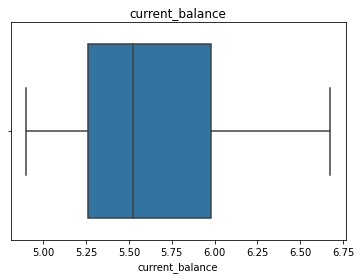

In [59]:
plt.title('current_balance')
sns.boxplot(df['current_balance'],orient='horizondal',color=None)
plt.show()

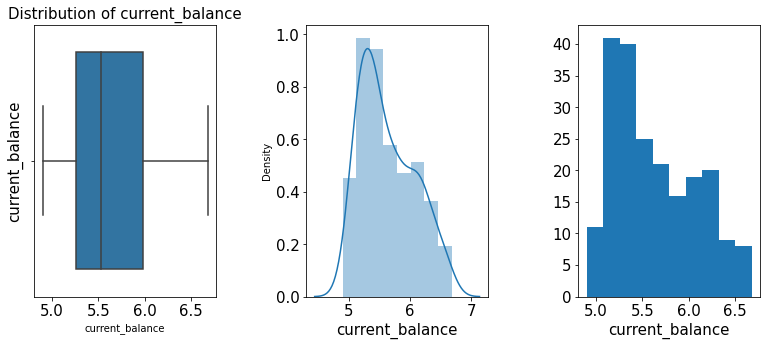

In [60]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
#boxplot
sns.boxplot(x='current_balance',data=df,orient='v',ax=ax1)
ax1.set_ylabel('current_balance', fontsize=15)
ax1.set_title('Distribution of current_balance', fontsize=15)
ax1.tick_params(labelsize=15)
#distplot
sns.distplot(df['current_balance'],ax=ax2)
ax2.set_xlabel('current_balance', fontsize=15)
ax2.tick_params(labelsize=15)
#histogram
ax3.hist(df['current_balance'])
ax3.set_xlabel('current_balance', fontsize=15)
ax3.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.show()

### credit_limit variable¶

In [61]:
print('Range of values: ', df['credit_limit'].max()-df['credit_limit'].min())

Range of values:  1.4030000000000005


In [62]:
print('Minimum credit_limit: ', df['credit_limit'].min())
print('Maximum credit_limit: ',df['credit_limit'].max())
print('Mean value: ', df['credit_limit'].mean())
print('Median value: ',df['credit_limit'].median())
print('Standard deviation: ', df['credit_limit'].std())
print('Null values: ',df['credit_limit'].isnull().any())

Minimum credit_limit:  2.63
Maximum credit_limit:  4.033
Mean value:  3.258604761904763
Median value:  3.237
Standard deviation:  0.37771444490658734
Null values:  False


In [63]:
Q1=df['credit_limit'].quantile(q=0.25)
Q3=df['credit_limit'].quantile(q=0.75)
print('credit_limit - 1st Quartile (Q1) is: ', Q1)
print('credit_limit - 3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of credit_limit is ', stats.iqr(df['credit_limit']))

credit_limit - 1st Quartile (Q1) is:  2.944
credit_limit - 3rd Quartile (Q3) is:  3.56175
Interquartile range (IQR) of credit_limit is  0.61775


In [64]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in credit_limit: ', L_outliers)
print('Upper outliers in credit_limit: ', U_outliers)

Lower outliers in credit_limit:  2.017375
Upper outliers in credit_limit:  4.488375


In [65]:
print('Number of outliers in credit_limit upper : ', df[df['credit_limit']>4.488375]['credit_limit'].count())
print('Number of outliers in credit_limit lower : ', df[df['credit_limit']<2.017375]['credit_limit'].count())
print('% of Outlier in credit_limit upper: ',round(df[df['credit_limit']>4.488375]['credit_limit'].count()*100/len(df)), '%')
print('% of Outlier in credit_limit lower: ',round(df[df['credit_limit']<2.017375]['credit_limit'].count()*100/len(df)), '%')

Number of outliers in credit_limit upper :  0
Number of outliers in credit_limit lower :  0
% of Outlier in credit_limit upper:  0 %
% of Outlier in credit_limit lower:  0 %


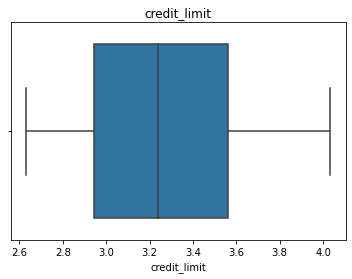

In [66]:
plt.title('credit_limit')
sns.boxplot(df['credit_limit'],orient='horizondal',color=None)
plt.show()

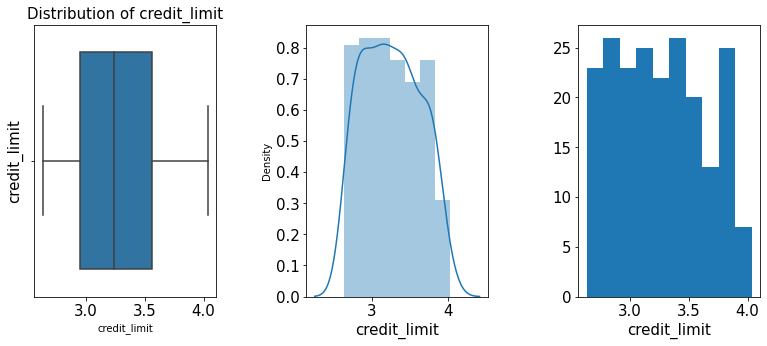

In [67]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='credit_limit',data=df,orient='v',ax=ax1)
ax1.set_ylabel('credit_limit', fontsize=15)
ax1.set_title('Distribution of credit_limit', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['credit_limit'],ax=ax2)
ax2.set_xlabel('credit_limit', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['credit_limit'])
ax3.set_xlabel('credit_limit', fontsize=15)
ax3.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.show()

### Min_payment_amt variable

In [68]:
print('Range of values: ', df['min_payment_amt'].max()-df['min_payment_amt'].min())

Range of values:  7.690899999999999


In [69]:
print('Minimum min_payment_amt: ', df['min_payment_amt'].min())
print('Maximum min_payment_amt: ',df['min_payment_amt'].max())
print('Mean value: ', df['min_payment_amt'].mean())
print('Median value: ',df['min_payment_amt'].median())
print('Standard deviation: ', df['min_payment_amt'].std())
print('Null values: ',df['min_payment_amt'].isnull().any())

Minimum min_payment_amt:  0.7651
Maximum min_payment_amt:  8.456
Mean value:  3.7002009523809503
Median value:  3.599
Standard deviation:  1.5035571308217792
Null values:  False


In [70]:
Q1=df['min_payment_amt'].quantile(q=0.25)
Q3=df['min_payment_amt'].quantile(q=0.75)
print('min_payment_amt - 1st Quartile (Q1) is: ', Q1)
print('min_payment_amt - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of min_payment_amt is ', stats.iqr(df['min_payment_amt']))

min_payment_amt - 1st Quartile (Q1) is:  2.5615
min_payment_amt - 3st Quartile (Q3) is:  4.76875
Interquartile range (IQR) of min_payment_amt is  2.2072499999999997


In [71]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in min_payment_amt: ', L_outliers)
print('Upper outliers in min_payment_amt: ', U_outliers)

Lower outliers in min_payment_amt:  -0.7493749999999992
Upper outliers in min_payment_amt:  8.079625


In [72]:
print('Number of outliers in min_payment_amt upper : ',df[df['min_payment_amt']>8.079625]['min_payment_amt'].count())
print('Number of outliers in min_payment_amt lower : ',df[df['min_payment_amt']<-0.749375]['min_payment_amt'].count())
print('% of Outlier in min_payment_amt upper:',round(df[df['min_payment_amt']>8.079625]['min_payment_amt'].count()*100/len(df)), '%')
print('% of Outlier in min_payment_amt lower:',round(df[df['min_payment_amt']<-0.749375]['min_payment_amt'].count()*100/len(df)), '%')

Number of outliers in min_payment_amt upper :  2
Number of outliers in min_payment_amt lower :  0
% of Outlier in min_payment_amt upper: 1 %
% of Outlier in min_payment_amt lower: 0 %


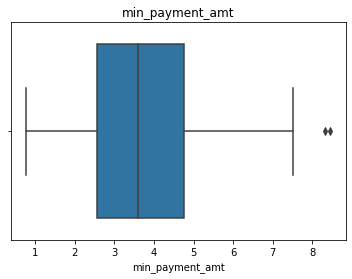

In [73]:
plt.title('min_payment_amt')
sns.boxplot(df['min_payment_amt'],orient='horizondal',color=None)
plt.show()

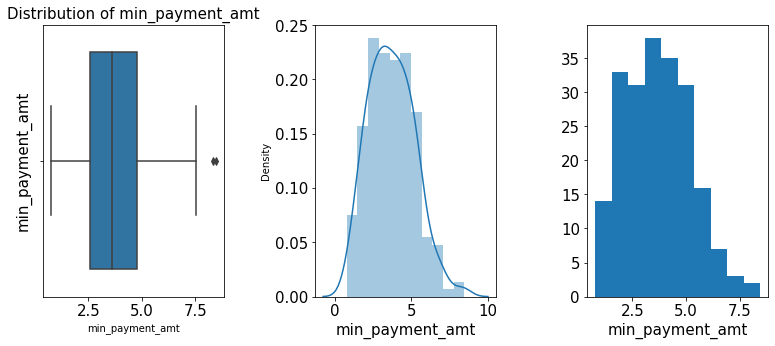

In [74]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='min_payment_amt',data=df,orient='v',ax=ax1)
ax1.set_ylabel('min_payment_amt', fontsize=15)
ax1.set_title('Distribution of min_payment_amt', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['min_payment_amt'],ax=ax2)
ax2.set_xlabel('min_payment_amt', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['min_payment_amt'])
ax3.set_xlabel('min_payment_amt', fontsize=15)
ax3.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.show()

Max_spent_in_single_shopping variable

In [75]:
print('Range of values: ', df['max_spent_in_single_shopping'].max()-df['max_spent_in_single_shopping'].min())

Range of values:  2.0309999999999997


In [76]:
print('Minimum max_spent_in_single_shopping: ',df['max_spent_in_single_shopping'].min())
print('Maximum max_spent_in_single_shoppings:',df['max_spent_in_single_shopping'].max())
print('Mean value: ', df['max_spent_in_single_shopping'].mean())
print('Median value: ',df['max_spent_in_single_shopping'].median())
print('Standard deviation: ', df['max_spent_in_single_shopping'].std())
print('Null values: ',df['max_spent_in_single_shopping'].isnull().any())

Minimum max_spent_in_single_shopping:  4.519
Maximum max_spent_in_single_shoppings: 6.55
Mean value:  5.408071428571429
Median value:  5.223000000000001
Standard deviation:  0.49148049910240543
Null values:  False


In [77]:
Q1=df['max_spent_in_single_shopping'].quantile(q=0.25)
Q3=df['max_spent_in_single_shopping'].quantile(q=0.75)
print('max_spent_in_single_shopping - 1st Quartile (Q1) is: ', Q1)
print('max_spent_in_single_shopping - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of max_spent_in_single_shopping is ', stats.iqr(df['max_spent_in_single_shopping']))

max_spent_in_single_shopping - 1st Quartile (Q1) is:  5.045
max_spent_in_single_shopping - 3st Quartile (Q3) is:  5.877
Interquartile range (IQR) of max_spent_in_single_shopping is  0.8319999999999999


In [78]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in max_spent_in_single_shopping: ', L_outliers)
print('Upper outliers in max_spent_in_single_shopping: ', U_outliers)

Lower outliers in max_spent_in_single_shopping:  3.797
Upper outliers in max_spent_in_single_shopping:  7.125


In [79]:
print('Number of outliers in max_spent_in_single_shopping upper : ',df[df['max_spent_in_single_shopping']>7.125000000000002]['max_spent_in_single_shopping'].count())
print('Number of outliers in max_spent_in_single_shopping lower : ',df[df['max_spent_in_single_shopping']<3.796999999999999]['max_spent_in_single_shopping'].count())
print('% of Outlier in max_spent_in_single_shopping upper:',round(df[df['max_spent_in_single_shopping']>7.125000000000002]['max_spent_in_single_shopping'].count()*100/len(df)), '%')
print('% of Outlier in max_spent_in_single_shopping lower:',round(df[df['max_spent_in_single_shopping']<3.796999999999999]['max_spent_in_single_shopping'].count()*100/len(df)), '%')

Number of outliers in max_spent_in_single_shopping upper :  0
Number of outliers in max_spent_in_single_shopping lower :  0
% of Outlier in max_spent_in_single_shopping upper: 0 %
% of Outlier in max_spent_in_single_shopping lower: 0 %


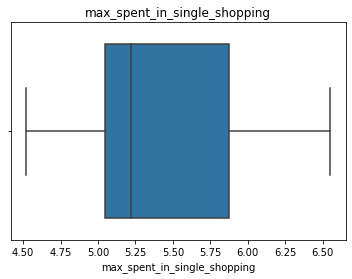

In [80]:
plt.title('max_spent_in_single_shopping')
sns.boxplot(df['max_spent_in_single_shopping'],orient='horizondal',color=None)
plt.show()

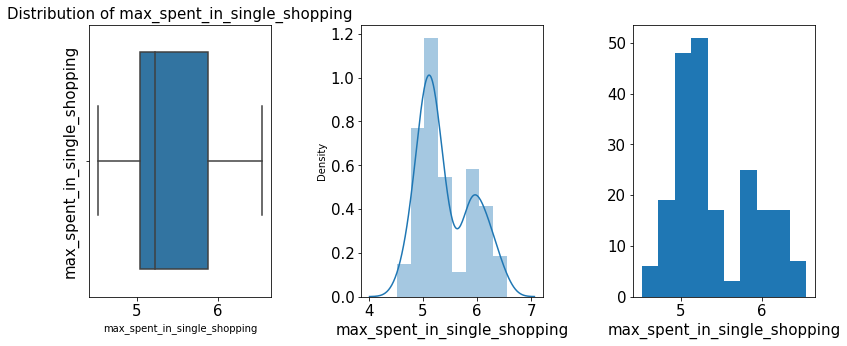

In [81]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='max_spent_in_single_shopping',data=df,orient='v',ax=ax1)
ax1.set_ylabel('max_spent_in_single_shopping', fontsize=15)
ax1.set_title('Distribution of max_spent_in_single_shopping', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['max_spent_in_single_shopping'],ax=ax2)
ax2.set_xlabel('max_spent_in_single_shopping', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['max_spent_in_single_shopping'])
ax3.set_xlabel('max_spent_in_single_shopping', fontsize=15)
ax3.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.show()

### Checking Distributions and Skewness of Variables:

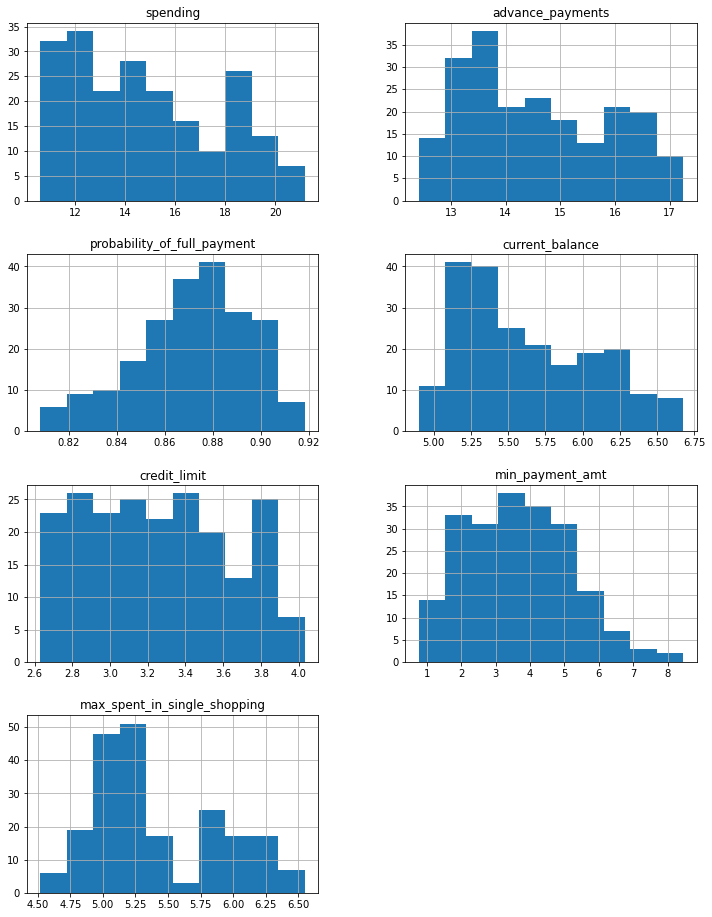

In [82]:
df.hist(figsize=(12,16),layout=(4,2));
plt.show()

In [83]:
df.skew().sort_values(ascending=False)

max_spent_in_single_shopping    0.561897
current_balance                 0.525482
min_payment_amt                 0.401667
spending                        0.399889
advance_payments                0.386573
credit_limit                    0.134378
probability_of_full_payment    -0.537954
dtype: float64

Distplot combines the matplotlib.hist function with seaborn kdeplot()

KDE Plot represents the Kernel Density Estimate

KDE is used for visualizing the Probability Density of a continuous variable.

KDE demonstrates the probability density at different values in a continuous variable.


# 1.2 Do you think scaling is necessary for clustering in this case? Justify¶

Scaling needs to be done as the values of the variables are different.

spending, advance_payments are in different values and this may get more weightage.

Also have shown below the plot of the data prior and after scaling.

Scaling will have all the values in the relative same range.

I have used zscore to standarised the data to relative same scale -3 to +3


#### Prior to scaling

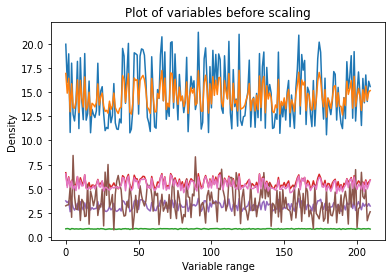

In [84]:
plt.plot(df)
plt.title('Plot of variables before scaling')
plt.xlabel('Variable range')
plt.ylabel('Density')
plt.show()

#### Scaling the attributes

In [85]:
from scipy.stats import zscore
df_Scaled=df.apply(zscore)
df_Scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


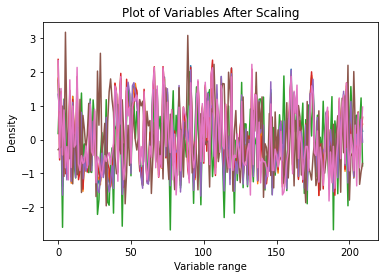

In [86]:
plt.plot(df_Scaled)
plt.ylabel("Density")
plt.xlabel("Variable range")
plt.title("Plot of Variables After Scaling")
plt.show()

# 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [87]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [88]:
link_method = linkage(df_Scaled, method = 'average') #here choosing average linkage method

Text(0.5, 1.0, 'Customer Segmentation Dendogram- Average Linkage')

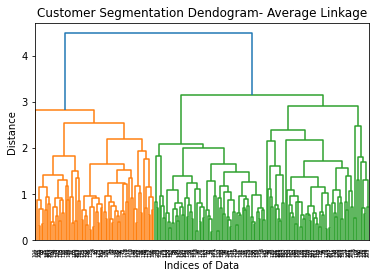

In [89]:
dend = dendrogram(link_method)
plt.xlabel("Indices of Data")
plt.ylabel("Distance")
plt.title("Customer Segmentation Dendogram- Average Linkage")

#### Cutting the Dendrogram with suitable clusters

Text(0.5, 1.0, 'Customer Segmentation Truncated Dendogram with last p 10')

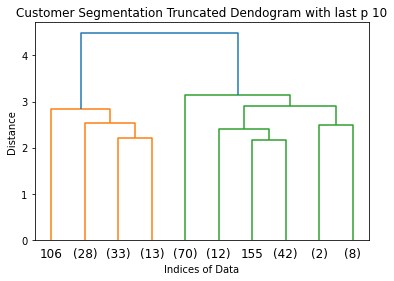

In [90]:
dend = dendrogram(link_method,          
truncate_mode='lastp',
p = 10)
plt.xlabel("Indices of Data")
plt.ylabel("Distance")
plt.title("Customer Segmentation Truncated Dendogram with last p 10")

Text(0.5, 1.0, ' Customer Segmentation Truncated Dendogram with last p 25')

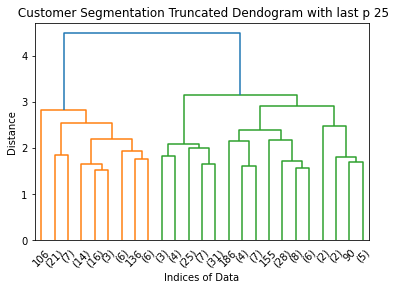

In [91]:
dend = dendrogram(link_method,
truncate_mode='lastp',
p = 25)
plt.xlabel("Indices of Data")
plt.ylabel("Distance")
plt.title(" Customer Segmentation Truncated Dendogram with last p 25")

#### Importing fcluster module to create clusters

In [92]:
from scipy.cluster.hierarchy import fcluster

In [93]:
clusters_3 = fcluster(link_method, 3, criterion='maxclust')
clusters_3

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [94]:
cluster3_df=df.copy()

In [95]:
cluster3_df['clusters-3'] = clusters_3

In [96]:
cluster3_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters-3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


#### Cluster Frequency

In [97]:
cluster3_df['clusters-3'].value_counts().sort_index()

1    75
2    70
3    65
Name: clusters-3, dtype: int64

#### Cluster Profile

In [98]:
aggdata=cluster3_df.groupby('clusters-3').mean()
aggdata['Freq']=cluster3_df['clusters-3'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters-3,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65


#### Another method - ward

In [99]:
wardlink = linkage(df_Scaled, method = 'ward')

Text(0.5, 1.0, ' Customer Segmentation-Dendrogram using Ward Linkage')

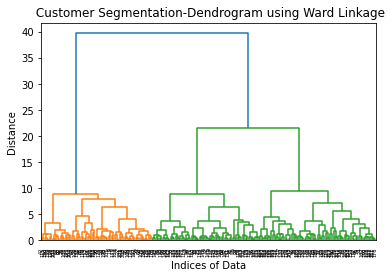

In [100]:
dend_wardlink = dendrogram(wardlink)
plt.xlabel("Indices of Data")
plt.ylabel("Distance")
plt.title(" Customer Segmentation-Dendrogram using Ward Linkage")

Text(0.5, 1.0, 'Customer Segmentation-Truncated Dendrogram ( Ward Linkage) with last p 25')

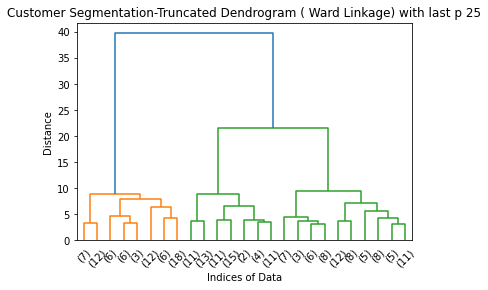

In [101]:
dend_wardlink = dendrogram(wardlink,truncate_mode='lastp',p = 25,)
plt.xlabel("Indices of Data")
plt.ylabel("Distance")
plt.title("Customer Segmentation-Truncated Dendrogram ( Ward Linkage) with last p 25")

In [102]:
clusters_wdlk_3 = fcluster(wardlink, 3, criterion='maxclust')
clusters_wdlk_3

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [103]:
cluster_w_3_df=df.copy()

In [104]:
cluster_w_3_df['clusters-3'] = clusters_wdlk_3

In [105]:
cluster_w_3_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters-3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [106]:
cluster_w_3_df['clusters-3'].value_counts().sort_index()

1    70
2    67
3    73
Name: clusters-3, dtype: int64

In [107]:
aggdata_w=cluster_w_3_df.groupby('clusters-3').mean()
aggdata_w['Freq']=cluster_w_3_df['clusters-3'].value_counts().sort_index()
aggdata_w

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters-3,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


Both the method are almost similer means , minor variation, which we know it occurs.

cluster grouping based on the dendrogram, 3 or 4 looks good. Did the further analysis, and based on the dataset had gone for 3 group cluster solution based on the hierarchical clustering.

Also in real time, there colud have been more variables value captured - tenure, BALANCE_

FREQUENCY, balance, purchase, installment of purchase, others.

And three group cluster solution gives a pattern based on high/medium/low spending with max_spent_in_single_shopping (high value item) and probability_of_full_payment(paymentmade).


# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [108]:
from sklearn.cluster import KMeans

In [109]:
k_means = KMeans(n_clusters = 1)
k_means.fit(df_Scaled)
k_means.inertia_

1469.9999999999995

In [110]:
k_means = KMeans(n_clusters = 2)
k_means.fit(df_Scaled)
k_means.inertia_

659.1717544870411

In [111]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_Scaled)
k_means.inertia_

430.65897315130064

In [112]:
wss =[]

In [113]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df_Scaled)
    wss.append(KM.inertia_)

In [114]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.18461253510196,
 328.29194596071216,
 289.75716763777797,
 262.80303615952397,
 240.93649615445918,
 222.86506226276117,
 206.89857970424046]

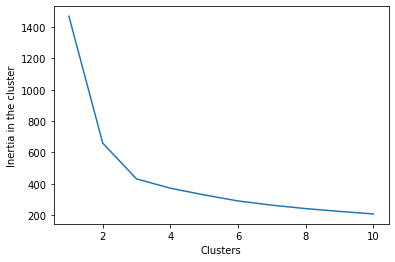

In [115]:
plt.plot(range(1,11), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

In [116]:
k_means_3 = KMeans(n_clusters = 3)
k_means_3.fit(df_Scaled)
labels_3 = k_means_3.labels_

In [117]:
kmeans3_df=df.copy()

In [118]:
kmeans3_df["Clus_kmeans"] = labels_3
kmeans3_df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [119]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [120]:
silhouette_score(df_Scaled,labels_3)

0.40072705527512986

In [121]:
from sklearn import metrics

In [122]:
scores = []
k_range = range(2, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(df_Scaled)
    scores.append(metrics.silhouette_score(df_Scaled, km.labels_))
scores

[0.46577247686580914,
 0.40072705527512986,
 0.3347542296283262,
 0.28621461554288646,
 0.285726896652541,
 0.2756098749293962,
 0.24943558736282168,
 0.2666366921192433,
 0.2731288488219916]

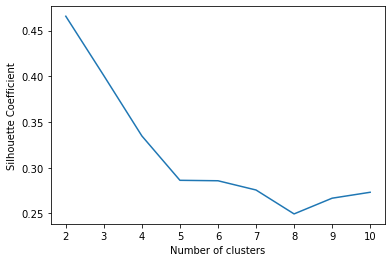

In [123]:
plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

From SC Score, the number of optimal clusters could be 3 or 4

In [124]:
sil_width = silhouette_samples(df_Scaled,labels_3)

In [125]:
kmeans3_df["sil_width"] = sil_width
kmeans3_df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.362276


In [126]:
silhouette_samples(df_Scaled,labels_3).min()

0.002713089347678376

3 Cluster Solution

In [127]:
km_3 = KMeans(n_clusters=3,random_state=123)

In [128]:
km_3.fit(df_Scaled)
km_3.labels_

array([1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2,
       1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0,
       1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0,
       0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1,
       0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2,
       1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0])

In [129]:
pd.Series(km_3.labels_).value_counts()

2    72
0    71
1    67
dtype: int64

#### K-Means Clustering & Cluster Information

In [130]:
kmeans1_df=df.copy()

In [131]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 425)
y_kmeans = kmeans.fit_predict(df_Scaled)
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
cluster = pd.DataFrame(y_kmeans1)
kmeans1_df['cluster'] = cluster
kmeans_mean_cluster = pd.DataFrame(round(kmeans1_df.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
cluster,,,,,,,
1,18.5,16.2,0.9,6.2,3.7,3.6,6.0
2,11.9,13.2,0.8,5.2,2.8,4.7,5.1
3,14.4,14.3,0.9,5.5,3.3,2.7,5.1


In [132]:
cluster_3_T = kmeans_mean_cluster.T

In [133]:
cluster_3_T

cluster,1,2,3
spending,18.5,11.9,14.4
advance_payments,16.2,13.2,14.3
probability_of_full_payment,0.9,0.8,0.9
current_balance,6.2,5.2,5.5
credit_limit,3.7,2.8,3.3
min_payment_amt,3.6,4.7,2.7
max_spent_in_single_shopping,6.0,5.1,5.1


I am going with 3 clusters via kmeans, but am showing the analysis of 4 and 5 kmeans cluster, I see
we based on current dataset given, 3 cluster solution makes sense based on the spending pattern
(High, Medium, Low)

#### 4-Cluster Solution

In [134]:
km_3 = KMeans(n_clusters=3,random_state=123)

In [135]:
km_3.fit(df_Scaled)
km_3.labels_

array([1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2,
       1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0,
       1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0,
       0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1,
       0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2,
       1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0])

In [136]:
pd.Series(km_3.labels_).value_counts()

2    72
0    71
1    67
dtype: int64

#### K-Means Clustering & Cluster Information

In [137]:
kmeans14_df=df.copy()

In [138]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 425)
y_kmeans = kmeans.fit_predict(df_Scaled)
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
cluster = pd.DataFrame(y_kmeans1)
kmeans14_df['cluster'] = cluster
kmeans_mean_cluster = pd.DataFrame(round(kmeans14_df.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
cluster,,,,,,,
1,18.5,16.2,0.9,6.2,3.7,3.6,6.0
2,11.9,13.2,0.8,5.2,2.8,4.7,5.1
3,14.4,14.3,0.9,5.5,3.3,2.7,5.1


In [139]:
cluster_3_T = kmeans_mean_cluster.T
cluster_3_T

cluster,1,2,3
spending,18.5,11.9,14.4
advance_payments,16.2,13.2,14.3
probability_of_full_payment,0.9,0.8,0.9
current_balance,6.2,5.2,5.5
credit_limit,3.7,2.8,3.3
min_payment_amt,3.6,4.7,2.7
max_spent_in_single_shopping,6.0,5.1,5.1


#### 5 cluster

In [140]:
kmeans15_df=df.copy()

In [141]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 425)
y_kmeans = kmeans.fit_predict(df_Scaled)
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
cluster = pd.DataFrame(y_kmeans1)
kmeans15_df['cluster'] = cluster
kmeans_mean_cluster = pd.DataFrame(round(kmeans15_df.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
cluster,,,,,,,
1,18.5,16.2,0.9,6.2,3.7,3.6,6.0
2,11.9,13.2,0.8,5.2,2.8,4.7,5.1
3,14.4,14.3,0.9,5.5,3.3,2.7,5.1


In [142]:
cluster_3_T = kmeans_mean_cluster.T
cluster_3_T

cluster,1,2,3
spending,18.5,11.9,14.4
advance_payments,16.2,13.2,14.3
probability_of_full_payment,0.9,0.8,0.9
current_balance,6.2,5.2,5.5
credit_limit,3.7,2.8,3.3
min_payment_amt,3.6,4.7,2.7
max_spent_in_single_shopping,6.0,5.1,5.1


In [143]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 425)
y_kmeans = kmeans.fit_predict(df_Scaled)
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
cluster = pd.DataFrame(y_kmeans1)
kmeans15_df['cluster'] = cluster
kmeans_mean_cluster = pd.DataFrame(round(kmeans15_df.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
cluster,,,,,,,
1,18.5,16.2,0.9,6.2,3.7,3.6,6.0
2,11.9,13.2,0.8,5.2,2.8,4.7,5.1
3,14.4,14.3,0.9,5.5,3.3,2.7,5.1


# 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

#### 3 group cluster via Kmeans

In [144]:
cluster_3_T

cluster,1,2,3
spending,18.5,11.9,14.4
advance_payments,16.2,13.2,14.3
probability_of_full_payment,0.9,0.8,0.9
current_balance,6.2,5.2,5.5
credit_limit,3.7,2.8,3.3
min_payment_amt,3.6,4.7,2.7
max_spent_in_single_shopping,6.0,5.1,5.1


#### 3 group cluster via hierarchical clustering

In [145]:
aggdata_w.T

clusters-3,1,2,3
spending,18.371429,11.872388,14.199041
advance_payments,16.145429,13.257015,14.233562
probability_of_full_payment,0.884400,0.848072,0.879190
current_balance,6.158171,5.238940,5.478233
credit_limit,3.684629,2.848537,3.226452
min_payment_amt,3.639157,4.949433,2.612181
max_spent_in_single_shopping,6.017371,5.122209,5.086178
Freq,70.000000,67.000000,73.000000


Group 1 : High Spending Group
•	Giving any reward points might increase their purchases.

•	maximum max_spent_in_single_shopping is high for this group, so can be offereddiscount/offer on next transactions upon full payment .

•	Increase there credit limit and Increase spending habits

•	Give loan against the credit card, as they are customers with good repayment record.

•	Tie up with luxary brands, which will drive more one_time_maximun spending

Group 3 : Medium Spending Group
•	They are potential target customers who are paying bills and doing purchases andmaintaining comparatively good credit score. So we can increase credit limit or can lowerdown interest rate.

•	Promote premium cards/loyalty cars to increase transactions.

•	Increase spending habits by trying with premium ecommerce sites, travel portal, travelairlines/hotel, as this will encourage them to spend more

Group 2 : Low Spending Group
•	customers should be given remainders for payments. Offers can be provided on earlypayments to improve their payment rate.

